In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/My\ Drive/ChatBot-NLP

/content/drive/My Drive/ChatBot-NLP


In [3]:
ls

ChatBot-NLP.ipynb  dialogs-data.txt


In [4]:
pip install nlp_utils

     |████████████████████████████████| 112 kB 5.4 MB/s 


In [5]:
#libraries required for the model
import nltk
import string
import pandas as pd
import nlp_utils as nu
import matplotlib.pyplot as plt

In [6]:
#reading the data 
f = open("dialogs-data.txt", "r")

#to print data upto specific lines
nl = 10 #no. of lines

for i in range(nl):
    l = f.readline()
    print(l)

hi, how are you doing?	i'm fine. how about yourself?

i'm fine. how about yourself?	i'm pretty good. thanks for asking.

i'm pretty good. thanks for asking.	no problem. so how have you been?

no problem. so how have you been?	i've been great. what about you?

i've been great. what about you?	i've been good. i'm in school right now.

i've been good. i'm in school right now.	what school do you go to?

what school do you go to?	i go to pcc.

i go to pcc.	do you like it there?

do you like it there?	it's okay. it's a really big campus.

it's okay. it's a really big campus.	good luck with school.



In [7]:
#reading the data 
df=pd.read_csv('dialogs-data.txt',names=('Query','Response'),sep=('\t'))
df

,Query,Response
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


**DATA UNDERSTANDING**

In [8]:
#to know the shape of the data
df.shape

(3725, 2)

In [9]:
#displaying the names of columns in the data
df.columns

Index(['Query', 'Response'], dtype='object')

In [10]:
#to get information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [11]:
#it shows us the frequency,unique and counts of all columns
df.describe()

,Query,Response
count,3725,3725
unique,3510,3512
top,what do you mean?,what do you mean?
freq,22,22


In [12]:
#this returns number of unique elements in the data
df.nunique() 

Query       3510
Response    3512
dtype: int64

In [13]:
#checking if null values are there in the data
df.isnull().sum()

Query       0
Response    0
dtype: int64

In [14]:
#checking the counts of the values present in the column 'Query'
df['Query'].value_counts()

what do you mean?                         22
why not?                                  16
what happened?                            10
why is that?                               9
me too.                                    7
                                          ..
we also get leather.                       1
then we went to a jazz club.               1
i've got to go.                            1
i really missed you a lot.                 1
i don't want to see a movie by myself.     1
Name: Query, Length: 3510, dtype: int64

In [15]:
#checking the counts of the values present in the column 'Response'
df['Response'].value_counts()

what do you mean?                         22
why not?                                  16
what happened?                            10
why is that?                               9
of course.                                 8
                                          ..
well, i can always pull over.              1
i'll look for you at my next party.        1
yes. a cow is man's best friend.           1
yes, it is. but it still looks good.       1
i don't want to see a movie by myself.     1
Name: Response, Length: 3512, dtype: int64

**DATA VISUALIZATION**

In [ ]:
import nltk
nltk.download('all')

In [18]:
#it is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [19]:
text=df['Query']

In [20]:
sid = SentimentIntensityAnalyzer()

count=0

for sentence in text:
    print(sentence)
        
    ss = sid.polarity_scores(sentence)
    for k in ss:
          print('{0}: {1}, ' .format(k, ss[k]), end='')
    print()
    count+=1
    if count==10: #displaying first 10 lines from the data
      break

hi, how are you doing?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm fine. how about yourself?
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.2023, 
i'm pretty good. thanks for asking.
neg: 0.0, neu: 0.25, pos: 0.75, compound: 0.8402, 
no problem. so how have you been?
neg: 0.495, neu: 0.505, pos: 0.0, compound: -0.5994, 
i've been great. what about you?
neg: 0.0, neu: 0.549, pos: 0.451, compound: 0.6249, 
i've been good. i'm in school right now.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
what school do you go to?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i go to pcc.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you like it there?
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
it's okay. it's a really big campus.
neg: 0.0, neu: 0.725, pos: 0.275, compound: 0.2263, 


In [21]:
#creating a dataframe
analyzer = SentimentIntensityAnalyzer()
df['rating'] = text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
df

,Query,Response,neg,neu,pos,compound
0,"hi, how are you doing?",i'm fine. how about yourself?,0.000,1.000,0.000,0.0000
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,0.000,0.690,0.310,0.2023
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,0.000,0.250,0.750,0.8402
3,no problem. so how have you been?,i've been great. what about you?,0.495,0.505,0.000,-0.5994
4,i've been great. what about you?,i've been good. i'm in school right now.,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?,0.000,0.707,0.293,0.4404
3721,are you right-handed?,yes. all my life.,0.000,1.000,0.000,0.0000
3722,yes. all my life.,you're wearing out your right hand. stop using...,0.000,0.526,0.474,0.4019
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.,0.153,0.625,0.222,0.2500


In [22]:
#importing word cloud - a visual representation of words
from wordcloud import WordCloud

In [23]:
#visualising wordcloud   
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=df.Query.values
    wc= WordCloud(background_color="black",max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98) 

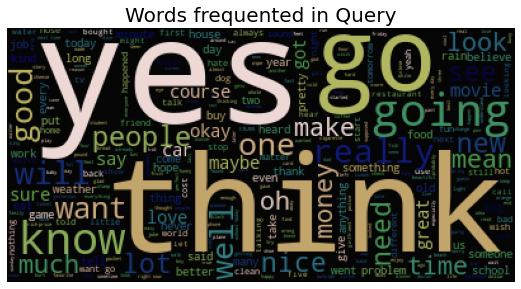

In [24]:
#top words in the 'Query' column
wordcloud(df,'Query')

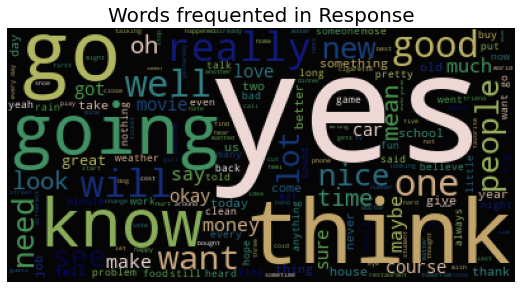

In [25]:
#top words in the 'Response' column
wordcloud(df,'Response')

**TEXT NORMALIZATION**

In [26]:
#importing regular expressions to detect and remove special characters
import re

In [27]:
#lower case conversion
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

#removing \n and replacing them with empty value
remove_n = lambda x: re.sub("\n", " ", x)

#removing non-ASCII characters
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

#removing alpha numeric values
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

#using map function and applying the function on 'Query' column
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

#using map function and applying the function on 'Response' column
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

df #cleaned data

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that s a good question maybe it s not old age,are you right handed,0.000,0.707,0.293,0.4404
3721,are you right handed,yes all my life,0.000,1.000,0.000,0.0000
3722,yes all my life,you re wearing out your right hand stop using...,0.000,0.526,0.474,0.4019
3723,you re wearing out your right hand stop using...,but i do all my writing with my right hand,0.153,0.625,0.222,0.2500


**IMPORTANT SENTENCE**

In [28]:
#arranging the compound column in descending order to find the best sentence 
imp_sent=df.sort_values(by='compound', ascending=False)

In [29]:
#printing the first 5 rows
imp_sent.head(5)

,Query,Response,neg,neu,pos,compound
1019,if we are good we will be happy in heaven wit...,that s what many people believe,0.0,0.400,0.600,0.9001
565,yeah it sounds like it s going to be the best...,exactly it seems like it s going to be loads ...,0.0,0.463,0.537,0.8910
1235,that is a lot of friends do you have a best f...,of course i have lots of best friends,0.0,0.400,0.600,0.8885
3414,well that s okay as long as it helps him rel...,yes we need a relaxed president who thinks cl...,0.0,0.419,0.581,0.8883
3470,so it s better to save money than to have an h...,well the democratic party says it was an hone...,0.0,0.482,0.518,0.8651


**TOP POSITIVE SENTENCE**

In [30]:
#arranging the dataframe by positive column in descending order to find the best postive sentence
pos_sent=df.sort_values(by='pos', ascending=False)

In [31]:
#printing the first 5 rows
pos_sent.head(5)

,Query,Response,neg,neu,pos,compound
1659,please,you know the rules,0.0,0.0,1.0,0.3182
1191,yes,no that s incomplete,0.0,0.0,1.0,0.4019
223,well congratulations,thank you,0.0,0.0,1.0,0.7184
2745,i agree,you never know what might happen on these free...,0.0,0.0,1.0,0.3612
3583,sure,thank you,0.0,0.0,1.0,0.3182


**TOP NEGATIVE SENTENCE**

In [32]:
#arranging the dataframe by negative column in descending order to find the best negative sentence
neg_sent=df.sort_values(by='neg', ascending=False)

In [33]:
#printing the first 5 rows
neg_sent.head(5)

,Query,Response,neg,neu,pos,compound
1294,no,how do you know,1.000,0.000,0.0,-0.2960
2378,no,he had dirty fingernails,1.000,0.000,0.0,-0.2960
154,no problem,did you need something,1.000,0.000,0.0,-0.5994
3095,no i hate vegetables,but you eat fruits,0.855,0.145,0.0,-0.7096
13,never better thanks,so how have you been lately,0.828,0.172,0.0,-0.5875


**TOP NEUTRAL SENTENCE**

In [34]:
#arranging the dataframe by neutral column in descending order to find the best neutral sentence
neu_sent=df.sort_values(by='neu', ascending=False)

In [35]:
#printing the first 5 rows
neu_sent.head(5)

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.0,1.0,0.0,0.0
3050,we get hamburgers and steak,oh that s so delicious,0.0,1.0,0.0,0.0
1596,what is gravity,it s the force that pulls everything down,0.0,1.0,0.0,0.0
1597,it s the force that pulls everything down,i don t understand,0.0,1.0,0.0,0.0
1598,i don t understand,if you pour water into a glass the water goes...,0.0,1.0,0.0,0.0


In [36]:
#importing tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
#word Embedding - TF-IDF
tfidf = TfidfVectorizer()

#changing column into array
factors = tfidf.fit_transform(df['Query']).toarray()

#displaying feature names
tfidf.get_feature_names()

['able',
 'about',
 'absolutely',
 'accident',
 'accidents',
 'aches',
 'across',
 'act',
 'action',
 'activities',
 'actor',
 'actors',
 'actress',
 'actually',
 'add',
 'added',
 'adding',
 'address',
 'ads',
 'adventure',
 'afford',
 'afraid',
 'after',
 'afternoon',
 'afterwards',
 'again',
 'against',
 'age',
 'ago',
 'agree',
 'ahead',
 'aid',
 'aids',
 'air',
 'airport',
 'aisle',
 'alarm',
 'alice',
 'alive',
 'all',
 'allergic',
 'alley',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'altitude',
 'always',
 'am',
 'amateur',
 'amazing',
 'american',
 'an',
 'and',
 'andy',
 'angeles',
 'angry',
 'animal',
 'animals',
 'anita',
 'anniversary',
 'another',
 'answer',
 'answered',
 'antenna',
 'any',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apartment',
 'apologize',
 'apologized',
 'apples',
 'appointment',
 'appreciate',
 'april',
 'are',
 'aren',
 'argument',
 'arizona',
 'arm',
 'arms',
 'army',
 'around',
 'arrow',
 'art',
 'a

**APPLICATION**

In [39]:
from sklearn.metrics.pairwise import cosine_distances
import nltk
from nltk.stem import WordNetLemmatizer

In [40]:
query = 'who are you ?'
def chatbot(query):
    #step:-1 clean
    var = nltk.word_tokenize(query)
    wnl = WordNetLemmatizer()
    query = ' '.join([wnl.lemmatize(words) for words in var])
    #query = nu.lemmatization_sentence(query)
    #step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    #step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    #searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict

In [43]:
while True:
    query = input('USER: ')
    if query == 'exit.':
        break
        
    response = chatbot(query)
    if response['score'] <= 0.2: # 
        print('BOT: Please rephrase your Question.')
    
    else:
        print('-'*50)
        print('logs:\n Matched Question: %r\n Confidence Score: %0.2f \n PositiveScore: %r \n NegativeScore: %r\n NeutralScore: %r'%(
            response['match'],response['score']*100,response['pos'],response['neg'],response['neu']))
        print('-'*50)
        print('BOT: ',response['response'])

USER: hi, how are you?
--------------------------------------------------
logs:
 Matched Question: 'hi  how are you doing '
 Confidence Score: 86.23 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
--------------------------------------------------
BOT:  i m fine  how about yourself 
USER: I'm pretty good. Thanks for asking.
--------------------------------------------------
logs:
 Matched Question: 'i m pretty good  thanks for asking '
 Confidence Score: 100.00 
 PositiveScore: 0.75 
 NegativeScore: 0.0
 NeutralScore: 0.25
--------------------------------------------------
BOT:  no problem  so how have you been 
USER: I've been good.
--------------------------------------------------
logs:
 Matched Question: 'i ve actually been pretty good  you '
 Confidence Score: 66.47 
 PositiveScore: 0.604 
 NegativeScore: 0.0
 NeutralScore: 0.396
--------------------------------------------------
BOT:  i m actually in school right now 
USER: what school do you go?
--------------------